<a href="https://colab.research.google.com/github/roverdp/calculo_seccion_cable_vs_corriente/blob/main/Seccion_de_cable_vs_corriente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos = np.array([[1,2,3],[0,1,2],[0,0,0]])       ### Aparentemente es lo mismo np.array(([1,2,3],[0,1,2]))
datos

array([[1, 2, 3],
       [0, 1, 2],
       [0, 0, 0]])

#Sección de cables vs Corrinente admisible

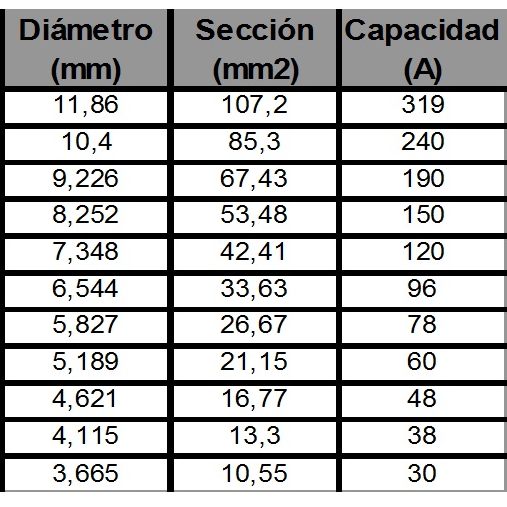

In [3]:
### Datos con formato string
lista = "11,86 107,2 319 10,4 85,3 240 9,226 67,43 190 8,252 53,48 150 7,348 42,41 120 6,544 33,63 96 5,827 26,67 78 5,189 21,15 60 4,621 16,77 48 4,115 13,3 38 3,665 10,55 30"

In [4]:
### Limpiando datos y convirtiendo a arreglos
lista = lista.replace(",",".")
lista

'11.86 107.2 319 10.4 85.3 240 9.226 67.43 190 8.252 53.48 150 7.348 42.41 120 6.544 33.63 96 5.827 26.67 78 5.189 21.15 60 4.621 16.77 48 4.115 13.3 38 3.665 10.55 30'

In [5]:
nueva_lista = np.fromstring(lista, dtype=float, sep=" ")
nueva_lista

array([ 11.86 , 107.2  , 319.   ,  10.4  ,  85.3  , 240.   ,   9.226,
        67.43 , 190.   ,   8.252,  53.48 , 150.   ,   7.348,  42.41 ,
       120.   ,   6.544,  33.63 ,  96.   ,   5.827,  26.67 ,  78.   ,
         5.189,  21.15 ,  60.   ,   4.621,  16.77 ,  48.   ,   4.115,
        13.3  ,  38.   ,   3.665,  10.55 ,  30.   ])

In [6]:
### Separando datos con salto tres
diametro = np.array(nueva_lista[0::3])
seccion = np.array(nueva_lista[1::3])
corriente = np.array(nueva_lista[2::3])
diametro, seccion, corriente

(array([11.86 , 10.4  ,  9.226,  8.252,  7.348,  6.544,  5.827,  5.189,
         4.621,  4.115,  3.665]),
 array([107.2 ,  85.3 ,  67.43,  53.48,  42.41,  33.63,  26.67,  21.15,
         16.77,  13.3 ,  10.55]),
 array([319., 240., 190., 150., 120.,  96.,  78.,  60.,  48.,  38.,  30.]))

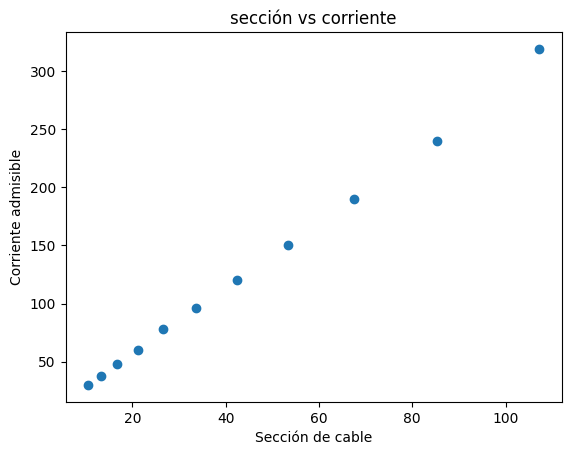

In [7]:
### Grafico de sección vs corriente
plt.xlabel('Sección de cable')
plt.ylabel('Corriente admisible')
plt.title('sección vs corriente')

plt.scatter(seccion,corriente)

In [8]:
### Ajuste lineal
coef, residuos, _, _, _= np.polyfit(seccion, corriente, 1, full=True)
a,b = coef
a,b,residuos

(2.9114721092543374, -2.0330369355958386, array([164.27670985]))

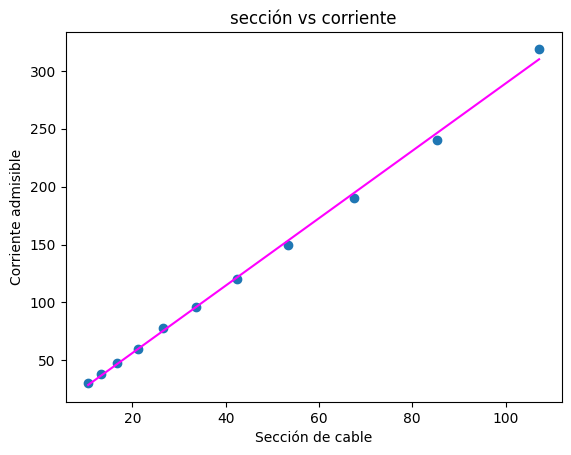

In [9]:
### Grafico
plt.xlabel('Sección de cable')
plt.ylabel('Corriente admisible')
plt.title('sección vs corriente')

plt.scatter(seccion,corriente)

# Generar valores de x para la línea de ajuste
x = np.linspace(min(seccion), max(seccion), 100)
plt.plot(x,a*x+b,color="magenta")

<ErrorbarContainer object of 3 artists>

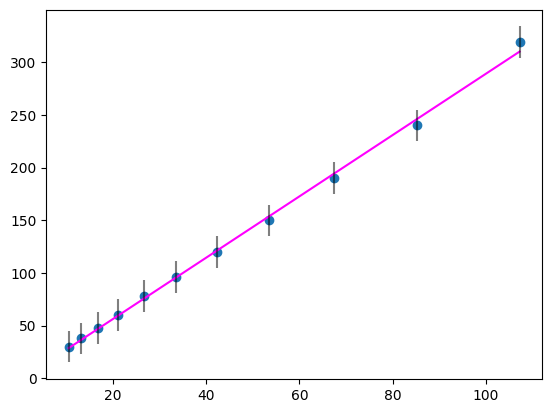

In [10]:
### Con su error

# Calcular el error estándar del ajuste
error_estandar = np.sqrt(residuos[0] / len(seccion))

plt.scatter(seccion,corriente)

# Generar valores de x para la línea de ajuste
x = np.linspace(min(seccion), max(seccion), 100)
plt.plot(x,a*x+b,color="magenta")

# Graficar las barras de error
plt.errorbar(seccion,corriente, yerr=error_estandar**2, linestyle='None', color='black', alpha=0.5)

### No representa bien el error